# 1 字符串处理成特征矩阵

In [9]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import jieba
import numpy as np
from sklearn.impute import SimpleImputer

### 1.1 Dictvectorizer

In [ ]:
"""

    dictvectorizer用于将字典类型转为特征矩阵
    类别型用独热码，数值型占一列，生成特征矩阵
    特征矩阵的列排行按照特征名（也就是字典的key）来，前前后后的也无关紧要，特征名通过vector容器的get_feature_names_out()查看
    sparse 参数决定形成特征矩阵是矩阵还是三元组
    

"""

In [8]:
from sklearn.feature_extraction import DictVectorizer

# 输入数据
data = [
    {'name': 'a', 'gender': 'male', 'age': 18},
    {'name': 'a', 'gender': 'female', 'age': 20},
    {'name': 'b', 'gender': 'male', 'age': 30}
]

# 创建 DictVectorizer 对象
vectorizer = DictVectorizer(sparse = False)

# 将字典数据转换为特征矩阵
X = vectorizer.fit_transform(data)

# 输出稀疏矩阵的密集表示
# print(X.toarray())

# 输出特征名（即独热编码后的列名）
print(vectorizer.get_feature_names_out())
print(X)

['age' 'gender=female' 'gender=male' 'name=a' 'name=b']
[[18.  0.  1.  1.  0.]
 [20.  1.  0.  1.  0.]
 [30.  0.  1.  0.  1.]]


### 1.2 Countvectorizer

In [ ]:
"""

    count的fit_transform会将文本串里的所有单词提取（空格分割），完了以后计算每个单词在每个文档（这里句子）出现次数
    返回词频表
    
    通过vector的get_feature_names_out()方法来查看容器所提取到的所有单词
"""

In [18]:
vector = CountVectorizer(min_df=2)
res = vector.fit_transform(
        ["life is  short,i like python life",
         "life is too long,i dislike python",
         "life is short"])
# print(res.toarray())
print(res)
print('-'*50)
print(vector.get_feature_names_out())


<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 10 stored elements and shape (3, 4)>
  Coords	Values
  (0, 1)	2
  (0, 0)	1
  (0, 3)	1
  (0, 2)	1
  (1, 1)	1
  (1, 0)	1
  (1, 2)	1
  (2, 1)	1
  (2, 0)	1
  (2, 3)	1
--------------------------------------------------
['is' 'life' 'python' 'short']


### 1.3 汉字的处理

In [ ]:
"""

    汉字的处理有点异于单词，毕竟汉字词语并不以空格分割，这时就需要调用现有工具jieba
    通过jieba内置方法.cut将文本转化为生成器再转为列表，通过' '.join方法插入空格
    再交由countvectorizer处理
    
"""

In [23]:
def cutword():
    """
    通过jieba对中文进行分词
    :return:
    """
    con1 = jieba.cut("今天很残酷，明天更残酷，后天很美好，但绝对大部分是死在明天晚上，所以每个人不要放弃今天。")

    con2 = jieba.cut("我们看到的从很远星系来的光是在几百万年之前发出的，这样当我们看到宇宙时，我们是在看它的过去。")

    con3 = jieba.cut("如果只用一种方式了解某样事物，你就不会真正了解它。了解事物真正含义的秘密取决于如何将其与我们所了解的事物相联系。")

    # 转换成列表
    print(type(con1))
    print('-' * 50)
    # 把生成器转换成列表
    content1 = list(con1)
    content2 = list(con2)
    content3 = list(con3)
    print(content1)
    print(content2)
    print(content3)
    # 把列表转换成字符串,每个词之间用空格隔开
    print('-' * 50)
    c1 = ' '.join(content1)
    c2 = ' '.join(content2)
    c3 = ' '.join(content3)

    return c1, c2, c3

def hanzivec():
    """
    中文特征值化
    :return: None
    """
    c1, c2, c3 = cutword() #jieba分词好的中文文本
    print('-'*50)
    print(c1)
    print(c2)
    print(c3)
    print('-'*50)

    cv = CountVectorizer()

    data = cv.fit_transform([c1, c2, c3])

    print(cv.get_feature_names_out())

    print(data.toarray())

    return None

# cutword()
hanzivec()

<class 'generator'>
--------------------------------------------------
['今天', '很', '残酷', '，', '明天', '更', '残酷', '，', '后天', '很', '美好', '，', '但', '绝对', '大部分', '是', '死', '在', '明天', '晚上', '，', '所以', '每个', '人', '不要', '放弃', '今天', '。']
['我们', '看到', '的', '从', '很', '远', '星系', '来', '的', '光是在', '几百万年', '之前', '发出', '的', '，', '这样', '当', '我们', '看到', '宇宙', '时', '，', '我们', '是', '在', '看', '它', '的', '过去', '。']
['如果', '只用', '一种', '方式', '了解', '某样', '事物', '，', '你', '就', '不会', '真正', '了解', '它', '。', '了解', '事物', '真正', '含义', '的', '秘密', '取决于', '如何', '将', '其', '与', '我们', '所', '了解', '的', '事物', '相', '联系', '。']
--------------------------------------------------
--------------------------------------------------
今天 很 残酷 ， 明天 更 残酷 ， 后天 很 美好 ， 但 绝对 大部分 是 死 在 明天 晚上 ， 所以 每个 人 不要 放弃 今天 。
我们 看到 的 从 很 远 星系 来 的 光是在 几百万年 之前 发出 的 ， 这样 当 我们 看到 宇宙 时 ， 我们 是 在 看 它 的 过去 。
如果 只用 一种 方式 了解 某样 事物 ， 你 就 不会 真正 了解 它 。 了解 事物 真正 含义 的 秘密 取决于 如何 将 其 与 我们 所 了解 的 事物 相 联系 。
--------------------------------------------------
['一种' '不会' '不要' '之前' 

### 1.4 TF-IDF Tfidfvectorizer

In [ ]:
"""
    内部算法实现：
                TF：term-frequency 词频
                TF(t,d) = f(t,d)             // 简单模式 词t在文档d中出现的频次
                TF(t,d) = f(t,d) / 总频次     // 复杂模式 词t在文档d中出现的次数 除以 所有文档中t出现的次数
              
                IDF：inverse-document-frequency 逆文档频率
                IDF = log( N / 1+df(t) )      // N为语料库中总文档数
                                                 df(t) = 包含t的文档数
                                                 +1 为了处理零分裂情况
                                                    
    Tfidfvectorizer()的fit_transform用于在文本分类中处理那些在每一个文档中都出现的垃圾词 比如“this”“and”等
    默认返回稀疏矩阵
"""

In [26]:
c1,c2,c3 = cutword()
tf = TfidfVectorizer(smooth_idf=True)
data = tf.fit_transform([c1,c2,c3])     
print(tf.get_feature_names_out())       #这个叼毛自己就会每隔一个文档生成一个50*‘-’
print('-'*100)
print(type(data))         #<class 'scipy.sparse._csr.csr_matrix'>   可以看到这就是一个稀疏矩阵
print('-'*100)
print(data.toarray())

<class 'generator'>
--------------------------------------------------
['今天', '很', '残酷', '，', '明天', '更', '残酷', '，', '后天', '很', '美好', '，', '但', '绝对', '大部分', '是', '死', '在', '明天', '晚上', '，', '所以', '每个', '人', '不要', '放弃', '今天', '。']
['我们', '看到', '的', '从', '很', '远', '星系', '来', '的', '光是在', '几百万年', '之前', '发出', '的', '，', '这样', '当', '我们', '看到', '宇宙', '时', '，', '我们', '是', '在', '看', '它', '的', '过去', '。']
['如果', '只用', '一种', '方式', '了解', '某样', '事物', '，', '你', '就', '不会', '真正', '了解', '它', '。', '了解', '事物', '真正', '含义', '的', '秘密', '取决于', '如何', '将', '其', '与', '我们', '所', '了解', '的', '事物', '相', '联系', '。']
--------------------------------------------------
['一种' '不会' '不要' '之前' '了解' '事物' '今天' '光是在' '几百万年' '发出' '取决于' '只用' '后天' '含义'
 '大部分' '如何' '如果' '宇宙' '我们' '所以' '放弃' '方式' '明天' '星系' '晚上' '某样' '残酷' '每个'
 '看到' '真正' '秘密' '绝对' '美好' '联系' '过去' '这样']
----------------------------------------------------------------------------------------------------
<class 'scipy.sparse._csr.csr_matrix'>
--------------------------------

# 2 特征处理，不同的特征拉到到同一个量纲

### 2.1 归一化处理 MinMaxScaler()

In [ ]:
"""

    归一化主要目的是为了消除量纲，即不同特征值单位、值域范围不同时 可以消除影响，使不同尺度的特征具有相同的权重
    MinMaxScaler归一化:通过将特征值线性映射到指定的范围，通常是[0,1]，来实现归一化
    
    公式：X' = （ X - Xmin ）/ （ Xmax - Xmin ）*( b- a ) + a   
    
    归一化结果就是[a,b]的范围，默认结果就是0，1 
    
    缺点：容易受到极值的影响，因为对比标准化，它减去的是 xmin 差值更大
    
    ** 在MinMaxScaler中transform和fit_transform的区别是transform用于测试集，而且不会重新找最小值和最大值
    ** 所以这也导致了即使归一化结果是0,1，在测试集测试过程中也可能由于异常值而导致结果出现负数
    
    **对于含有异常值的数据，可以使用 RobustScaler（它通过中位数和四分位数来进行缩放）来减少异常值的影响，或者在使用 MinMaxScaler 前进行数据清理（例如去除或修正异常值）。


"""

In [27]:
def mm():

    # 归一化缺点 容易受极值的影响
    #feature_range代表特征值范围，一般设置为(0,1),或者(-1,1),默认是(0,1)
    mm = MinMaxScaler(feature_range=(0, 1))

    data = mm.fit_transform([[90, 2, 10, 40], [60, 4, 15, 45], [75, 3, 13, 46]])

    print(data)
    print('-'*50)
    out=mm.transform([[1, 2, 3, 4],[6, 5, 8, 7]])
    print(out)
    return None
    #transform和fit_transform不同是，transform用于测试集，而且不会重新找最小值和最大值

mm()

[[1.         0.         0.         0.        ]
 [0.         1.         1.         0.83333333]
 [0.5        0.5        0.6        1.        ]]
--------------------------------------------------
[[-1.96666667  0.         -1.4        -6.        ]
 [-1.8         1.5        -0.4        -5.5       ]]


### 2.2标准化 StanderScaler()

In [ ]:
"""

    标准化处理
    
    公式： X' = (X - μ) / σ       // μ是特征值组的均值，σ是特征值组标准差
    
    由于对数据集的每个特征值都减去均值，就会导致结果的数据集组的均值为0，标准差和方差为1
    

"""

In [30]:
def stand():
    std = StandardScaler()

    data = std.fit_transform([[1., -1., 3.], [2., 4., 2.], [4., 6., -1.]])



    ##注意这里的std的mean_和var_、n_samples_seen_方法，只有给std传入过数据以后才有意义
    
    print(data)
    print('-' * 50)
    print(std.mean_)
    print('-' * 50)
    print(std.var_)
    print(std.n_samples_seen_)  # 样本数
    return data


data=stand()
type(data)





[[-1.06904497 -1.35873244  0.98058068]
 [-0.26726124  0.33968311  0.39223227]
 [ 1.33630621  1.01904933 -1.37281295]]
--------------------------------------------------
[2.33333333 3.         1.33333333]
--------------------------------------------------
[1.55555556 8.66666667 2.88888889]
3


numpy.ndarray

# 3 缺失值处理



### 3.1 填补 SimpleImputer()

In [ ]:
""" 
    SimpleInputer()可以通过strategy方法选择用均值、中位数、众数或是constant来填补缺失值
    
    常数填补法还需补一个参数 fill_value = 参数（这个参数可以是任何类型，字符串啥的）
    
    当数据类型不是数值时，就可以用const或是众数
"""

In [31]:

def im():
    # NaN, nan,缺失值必须是这种形式，如果是？号(或者其他符号)，就要replace换成这种
    
    im = SimpleImputer(missing_values=np.nan, strategy='mean')

    data = im.fit_transform([[1, 2], [np.nan, 3], [7, 6], [3, 2]])

    print(data)

    return None


im()

[[1.         2.        ]
 [3.66666667 3.        ]
 [7.         6.        ]
 [3.         2.        ]]


# 4 降维

In [ ]:
"""
    降维顾名思义就是将特征数的维度（这里的维度指的就是特征矩阵里的列数）减少，增加计算效率
"""

### 4.1 过滤式降维：特征选择-删除低方差的特征 VarianceThreshold(threshold = 0.1) （无监督）

In [ ]:
"""
    用于去除低方差的特征 因为他对模型训练带来的贡献小，可以去除
    threshold：指定方差的最小阈值，只有方差大于该值的特征才会被保留。
    threshold=0（默认）会去除所有方差为 0 的特征，即去除常量特征。
    get_supprot() 用于输出被保留下来的特征列
"""

In [32]:
def var():

    #默认只删除方差为0,threshold是方差阈值，删除比这个值小的那些特征
    var = VarianceThreshold(threshold=0.1)

    data = var.fit_transform([[0, 2, 0, 3],
                              [0, 1, 4, 3],
                              [0, 1, 1, 3]])

    print(data)
    # 获得剩余的特征的列编号
    print('The surport is %s' % var.get_support(True))
    return None


var()


[[2 0]
 [1 4]
 [1 1]]
The surport is [1 2]


### 4.2 主成分分析 PCA


In [ ]:
"""
    主成分分析 pca
    
    n_ components:小数 0~1 90% 业界选择 90~95%

    当n_components的值为0到1之间的浮点数时，表示我们希望保留的主成分解释的方差比例。方差比例是指 得到输出的每一列的方差值和除以原有数据方差之和。
    具体而言，n_components=0.9表示我们希望选择足够的主成分，以使它们解释数据方差的90%。

    n_components如果是整数   减少到的特征数量
    原始数据方差
"""

In [ ]:
"""
    PCA 的原理
    PCA 主要通过以下几个步骤实现数据的降维：

    1.标准化数据：如果数据的各个特征具有不同的尺度，首先对数据进行标准化处理，使得每个特征的均值为 0，方差为 1（即转换为标准正态分布）。这一步骤非常重要，因为 PCA 对不同尺度的特征非常敏感。
    2.计算协方差矩阵：计算数据集中各个特征之间的协方差，用于衡量特征之间的相关性。
    3.计算特征值和特征向量：通过特征分解协方差矩阵，得到特征值和特征向量。特征向量表示数据的新轴方向，特征值表示该方向上数据的变异性。
    4.选择主成分：根据特征值的大小，选择前几个特征值对应的特征向量作为主成分。特征值越大，表示该主成分方向上的数据变异性越大，越重要。
    5.投影数据：将数据投影到这些选定的主成分上，得到降维后的数据。
    
"""

#### 4.2.1 试例1  2维降1维

In [42]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

# 示例数据
X = np.array([[2.5, 2.4],
              [0.5, 0.7],
              [2.2, 2.9],
              [1.9, 2.2],
              [3.1, 3.0]])

# 数据标准化
std = StandardScaler()
X_std = std.fit_transform(X)

# 创建 PCA 对象，降到 1 维
pca = PCA(n_components=1)

# 拟合并转换数据
X_pca = pca.fit_transform(X_std)

print("降维后的数据：")
print(X_pca)

print(pca.explained_variance_ratio_)



降维后的数据：
[[ 0.5124457 ]
 [-2.57528445]
 [ 0.69555387]
 [-0.1485184 ]
 [ 1.51580328]]
[0.96982031]


查看pca降维前后对比

In [38]:
# 创建 PCA 对象，保留所有主成分 
# X_std.shape[1]就是x_std原来的1维的数据量，也就是列数 主要还是二维的处理办法(先挖坑)
pca = PCA(n_components=X_std.shape[1])

# 拟合数据
pca.fit(X_std)

# 查看各主成分的方差贡献比例
print("各主成分的方差贡献比例：")
print(pca.explained_variance_ratio_)

# 查看总方差贡献
print("总方差贡献：", sum(pca.explained_variance_ratio_))

各主成分的方差贡献比例：
[0.96982031 0.03017969]
总方差贡献： 1.0


In [39]:
arr = np.array([[[1, 2], [3, 4], [5, 6]],
                [[7, 8], [9, 10], [11, 12]],
                [[13, 14], [15, 16], [17, 18]],
                [[19, 20], [21, 22], [23, 24]]])
arr.shape[1]

3

# 均匀分布

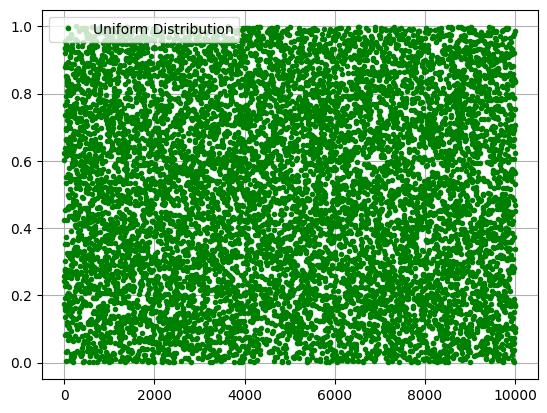

In [40]:
from matplotlib import pyplot as plt
x = np.random.rand(10000) #每个的概率
t = np.arange(len(x))
plt.plot(t,x,'g.',label="Uniform Distribution")
plt.legend(loc="upper left")
plt.grid()
plt.show()